<a href="https://colab.research.google.com/github/dahmed301/POST_API/blob/main/CW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis for House Prices Dataset**

##ABSTRACT
This document outlines the process of performing exploratory data analaysis on the House Prices dataset. For this project, Jupyter Notebook environment has been used through the Google Colab tool. The aim is to investigate and explore trends in the data by visualising them after ingesting, cleaning and transforming the data. Variables are chosen and some correlations are looked at in order to understand the raw data and present a story. The steps taken throughout the process, relevant explanations, the required Python code and visualisations have been provided within this Notebook. Moreover, the Notebook has been exported as a pdf file as well which is also provided along with this Notebook.

##INTRODUCTION
###Background
The House Prices dataset uses information from the Assessor's Office and is published on Kaggle containing the details of houses sold between 2006 and 2010 in a town called Ames in Iowa, USA. It characterizes the housing market of that town by comprehensively capturing a wide array of variables associated with the sales of houses such as the physical features of the property, locality information, price and also some metrics on the quality and condition of various aspects of the house.
The dataset is provided in the form of two separate text files formatted as tables which are tab separated. One contains all the available variables, and the other contains the sale price of each property along with its unique ID. These datasets can be merged to attain the full picture and perform the required investigations on it. Overall, it is a wholesome dataset which is ideal for performing exploratory data analysis to identify patterns and trends hidden in the raw data.

###Objectives
The primary objective is to explore the dataset and generate meaningful insights from it. This objective can be achieved by performing EDA (Exploratory Data Analysis) on the dataset by importing, cleaning, merging and exploring the variables. This process can be streamlined by following the steps given below:


*   Import & merge the datasets to create one DataFrame for ease of recalling
*   Check for duplicate and missing values to ensure integrity of the analysis
*   Identify important variables and their data types to give a direction to the EDA
*   Explore the variables by obtaining their distributions & summary statistics
*   Visualise and correlate some variables to generate insights
*   Derive conclusions and key findings to wrap up the EDA

##DATA CLEANING & TRANSFORMATION
To begin our EDA, we need to import the datasets and to do that, first we need to import the required Python packages which will also make the EDA more efficient and easy to perform.

In [ ]:
# Import the pandas library as 'pd' for data manipulation and analysis
import pandas as pd

# Import the numpy library as 'np' for numerical operations
import numpy as np

# Import the matplotlib.pyplot library as 'plt' for creating visualizations
import matplotlib.pyplot as plt

# Import the seaborn library as 'sns' for enhanced data visualization
import seaborn as sns

# Import the missingno library as 'msno' for visualizing missing data patterns
import missingno as msno


Since we are using Google Colab environment, we need to link it to a Google Drive to access files and folders because if we use the local directory, we would have to upload the file everytime we close the notebook. This happens because Google Colab uses Google's online runtime where the code is saved and executed. Once the runtime is terminated or disconnected, the saved variables and datasets are lost. Linking the datasets through Google Drive takes care of that problem and ensures seamless access to files whenever the code is executed.

In [ ]:
#Mounting the Google Drive where datasets are saved

from google.colab import drive
drive.mount('/content/drive')

###Data Ingestion
After mounting the drive, we ingest our datasets which are available in text format (.txt file). They can be imported using pandas which reads them in the defined drive path, unpacks them according to the given separator (tab or \t in this case) and saves them as Data Frames.

In [ ]:
#Ingesting the two datasets as DataFrames using pandas

housing1 = pd.read_table('/content/drive/MyDrive/HousingData/Housing_1.txt',sep='\t')
housing2 = pd.read_table('/content/drive/MyDrive/HousingData/Housing_2.txt',sep='\t')

Let's have a look at our Data Frames:

In [ ]:
#Viewing first five rows of the housing1 Data Frame

housing1.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [ ]:
#Viewing first five rows of the housing2 Data Frame

housing2.head()

,Order,PID,MS SubClass,SalePrice
0,1,526301100,20,215000
1,2,526350040,20,105000
2,3,526351010,20,172000
3,4,526353030,20,244000
4,5,527105010,60,189900


###Merging Data

As noticed, the two Data Frames have the same unique identifier - the Property ID which is named 'PID' in this case. Therefore, these two objects can be merged using 'PID' to form a single DataFrame

In [ ]:
# Merge two DataFrames, 'housing1' and 'housing2', using the common column 'PID'
raw_data = pd.merge(housing1, housing2, on='PID')

# Display the first few rows of the merged DataFrame to inspect the result
raw_data.head()

,Order_x,PID,MS SubClass_x,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,Order_y,MS SubClass_y,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2010,WD,Normal,1,20,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,MnPrv,NaN,0,6,2010,WD,Normal,2,20,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,Gar2,12500,6,2010,WD,Normal,3,20,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,Normal,4,20,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,MnPrv,NaN,0,3,2010,WD,Normal,5,60,189900


Let's inspect the shape and type of our raw dataset:

In [ ]:
#Checking the dimensions and type of the raw_data object

print("Dimensions: {} rows x {} columns".format(raw_data.shape[0],raw_data.shape[1]))
print(type(raw_data))

Dimensions: 2939 rows x 84 columns
<class 'pandas.core.frame.DataFrame'>


###Removing Duplicates

Now that we know that we have 2939 observations and 84 variables in our dataset, let's see if we have any duplicate values. If there are duplicates, we need to remove them because they can impact the analysis. Since 'PID' is the unique ID, we can check that for duplicates because it must only have unique values for each property.

In [ ]:
# Identify duplicate rows based on the 'PID' column in the 'raw_data' DataFrame
duplicates = raw_data['PID'].duplicated()

# Display rows that are duplicates based on the 'PID' column
# This shows a subset of the 'raw_data' DataFrame containing only the duplicated rows
raw_data[duplicates]

,Order_x,PID,MS SubClass_x,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,Order_y,MS SubClass_y,SalePrice
146,146,535175070,20,RL,73.0,9300,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,Normal,146,20,167500
147,146,535175070,20,RL,73.0,9300,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,Normal,146,20,167500
148,146,535175070,20,RL,73.0,9300,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,Normal,146,20,167500
150,147,535175180,20,RL,87.0,10725,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2010,WD,Normal,147,20,108538
151,147,535175180,20,RL,87.0,10725,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2010,WD,Normal,147,20,108538
152,147,535175180,20,RL,87.0,10725,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2010,WD,Normal,147,20,108538
154,148,535179020,20,RL,80.0,10032,Pave,NaN,Reg,Lvl,...,GdWo,NaN,0,6,2010,WD,Normal,148,20,159500
155,148,535179020,20,RL,80.0,10032,Pave,NaN,Reg,Lvl,...,GdWo,NaN,0,6,2010,WD,Normal,148,20,159500
156,148,535179020,20,RL,80.0,10032,Pave,NaN,Reg,Lvl,...,GdWo,NaN,0,6,2010,WD,Normal,148,20,159500


As we can see, there are 9 rows that are duplicated. Now let's remove them.

In [ ]:
# Remove duplicate rows based on the 'PID' column in the 'raw_data' DataFrame
data = raw_data.drop_duplicates(subset='PID')
print("No. of rows after removing duplicates: ", len(data))

No. of rows after removing duplicates:  2930


Notice that there were 9 duplicates. So, our rows changed from 2939 to 2930 after removing duplicates.

###Handling Missing/NA Values

Now, let's check for any missing or null values in our data. The fraction of missing or null (NaN) values in the data can negatively effect our EDA by obsuring the findings. If a column has more missing values than a defined threshold, we need to drop those columns because they will not be of any use to us in our analysis.

In [ ]:
# Calculate the percentage of missing values in each column
null = data.isnull().sum() / len(data) * 100

# Display the top 10 columns with the highest percentage of missing values
print(null.sort_values(ascending=False).head(10))

# Identify columns with more than 40% missing values
columns_to_drop = null[null > 40].index

# Drop columns with more than 40% missing values from the DataFrame
clean_data = data.drop(columns=columns_to_drop)

#Check the null values to make sure the columns are removed
null = clean_data.isnull().sum() / len(data) * 100
print("\n")
print(null.sort_values(ascending=False).head(10))

Pool QC          99.556314
Misc Feature     96.382253
Alley            93.242321
Fence            80.477816
Fireplace Qu     48.532423
Lot Frontage     16.723549
Garage Finish     5.426621
Garage Cond       5.426621
Garage Yr Blt     5.426621
Garage Qual       5.426621
dtype: float64


Lot Frontage      16.723549
Garage Cond        5.426621
Garage Yr Blt      5.426621
Garage Finish      5.426621
Garage Qual        5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
BsmtFin Type 1     2.730375
Bsmt Cond          2.730375
dtype: float64


###Removing Outliers

Next step is to have a look at the outliers. Perhaps the most important variable in our data is the Sales Price. Another important variable is the Living Area (square feet) of the property/house. If we investigate these two continous variables, we might be able to identify some outliers. Here we make a couple of box plots to visualise the spread of the two mentioned variables.

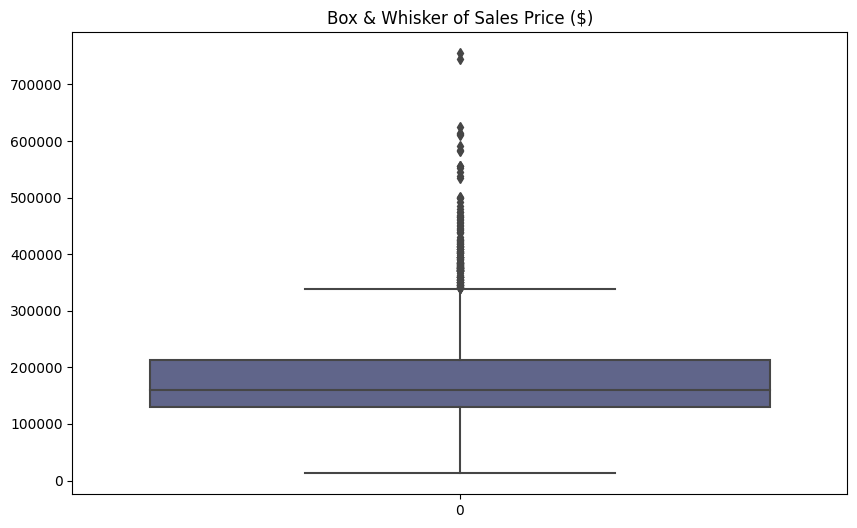

In [ ]:
#Box & Whisker of Sales Price

plt.figure(figsize=(10,6))
sns.boxplot(clean_data['SalePrice'], color = '#595f91')
plt.title('Box & Whisker of Sales Price ($)')
plt.show()

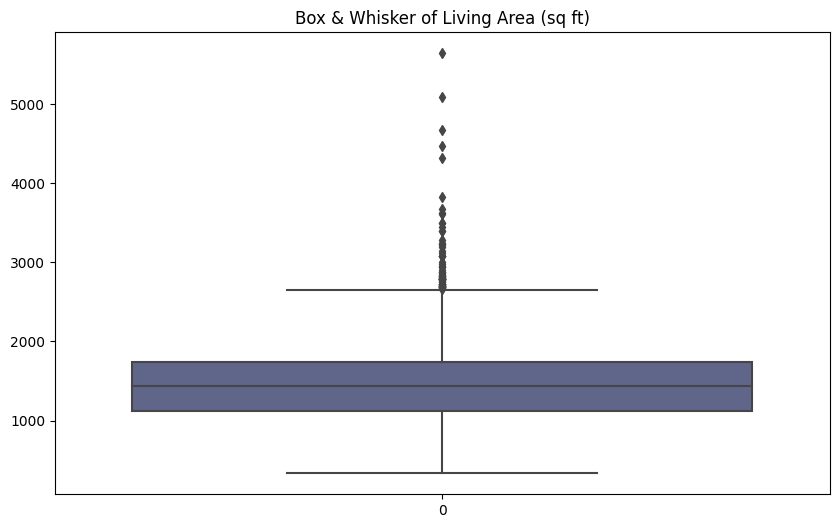

In [ ]:
#Box & Whisker of Gr Liv Area

plt.figure(figsize=(10,6))
sns.boxplot(clean_data['Gr Liv Area'], color = '#595f91')
plt.title('Box & Whisker of Living Area (sq ft)')
plt.show()

We can notice that there are some values which are way too far from the normal range of the variable. The mean and upper quartile are around $200,000 for the SalePrice and around 2000 sqft. for the Living Area. But the values beyond the maximum bars are potential outliers on the higher end of the distribution. Let's plot a scatterplot of these two variables to have a better view.

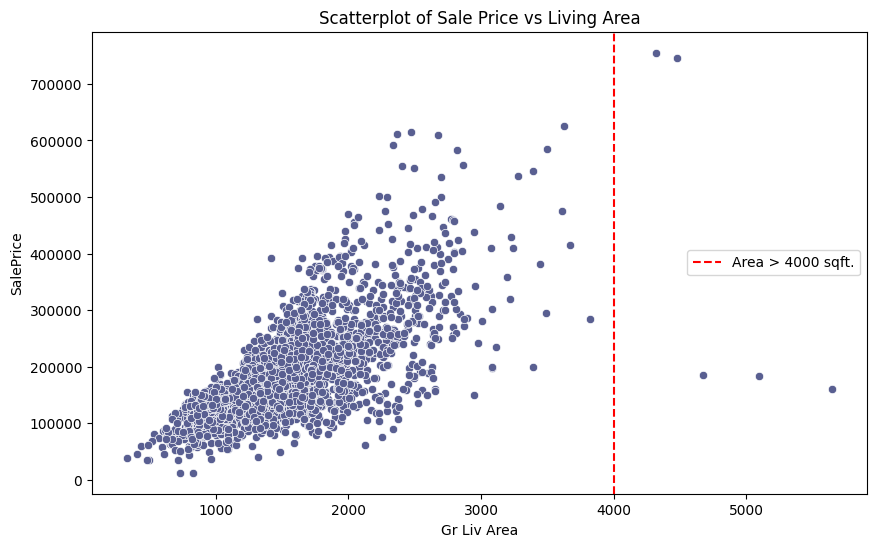

In [ ]:
# Set the figure size to 10x6 inches for the scatterplot
plt.figure(figsize=(10, 6))

# Create a scatter plot using Seaborn, with x='Gr Liv Area' and y='SalePrice' from the 'data' DataFrame
sns.scatterplot(clean_data, x='Gr Liv Area', y='SalePrice', color='#595f91')

# Add a vertical line at x=4000 with a red dashed line style and label for annotation
plt.axvline(x=4000, color='red', linestyle='--', label='Area > 4000 sqft.')

# Set the title of the scatterplot
plt.title('Scatterplot of Sale Price vs Living Area')

# Place the legend in the center-right position
plt.legend(loc="center right")

# Display the plot
plt.show()


We can observe that there are 5 points that lie beyond the red line which is drawn at 4000 sqft. This indicates that these 5 properties were unusual. The top 2 are really big houses having very high prices, and the bottom 3 are very large houses with unusually low prices. These 5 points are true outliers which need to be removed from our data as they skew our distributions and affect the correlations.

In [ ]:
#Removing rows with Living Area greater than 4000

filtered_data = clean_data.loc[raw_data['Gr Liv Area'] <= 4000]

###Choosing Variables
Now that our data is clean, we can move ahead by choosing our variables and exoploring their data types. Upon careful examination of our data, we can select our variables of interest which can have some hidden trends and patterns.

To perform an effective analysis, we need to choose such variables that have an impact on each other and generate meaningful insights. For that purpose, we can select the following columns from our data:
*   Neighborhood
*   Year Sold
*   Overall Quality
*   Year Built
*   Living Area
*   Sale Price

In [ ]:
#Selecting variables of interest

ex_data = filtered_data[['SalePrice','Gr Liv Area','Overall Qual','Year Built','Neighborhood']]

#Checking our variables and their data types
ex_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2938
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalePrice     2925 non-null   int64 
 1   Gr Liv Area   2925 non-null   int64 
 2   Overall Qual  2925 non-null   int64 
 3   Year Built    2925 non-null   int64 
 4   Neighborhood  2925 non-null   object
dtypes: int64(4), object(1)
memory usage: 137.1+ KB


###Data Types & Descriptive Statistics

Our data now has 5 variables out of which 2 are continuous (Sale Price & Living Area) while 3 are discrete (Overall Quality, Year Built & Neighborhood). But due to their nature, the Overall Quality and Year Built variables have numerical data types despite being discrete beacuse they only take certain fixed integer values. While neighborhood has a string data type representing the names of localities.
Let's take a look at the statistical summaries of our numerical variables.

In [ ]:
#Summary statistics of the numerical variables and round the values to 2 decimal places

ex_data.describe().round(2)

,SalePrice,Gr Liv Area,Overall Qual,Year Built
count,2925.00,2925.00,2925.00,2925.00
mean,180411.57,1493.98,6.09,1971.30
std,78554.86,486.27,1.40,30.24
min,12789.00,334.00,1.00,1872.00
25%,129500.00,1126.00,5.00,1954.00
50%,160000.00,1441.00,6.00,1973.00
75%,213500.00,1740.00,7.00,2001.00
max,625000.00,3820.00,10.00,2010.00


We can see that the median values (50%) are reasonably close to the respective mean values, which means that the data has no more extreme outliers. Also the Overall Quality is a discrete variable ranging from 1 to 10. The Standard deviations and the Quartiles of the variables can be seen as well. We will explore these distribution more in the following section.

##DATA EXPLORATION & VISUALISATION

Now let us dive into the exploration and visualisation of the data at hand. First we will look at some variables in isolation to perform Univariate Analysis. Later some correlations will be looked at in order to get a Bivariate Analysis.

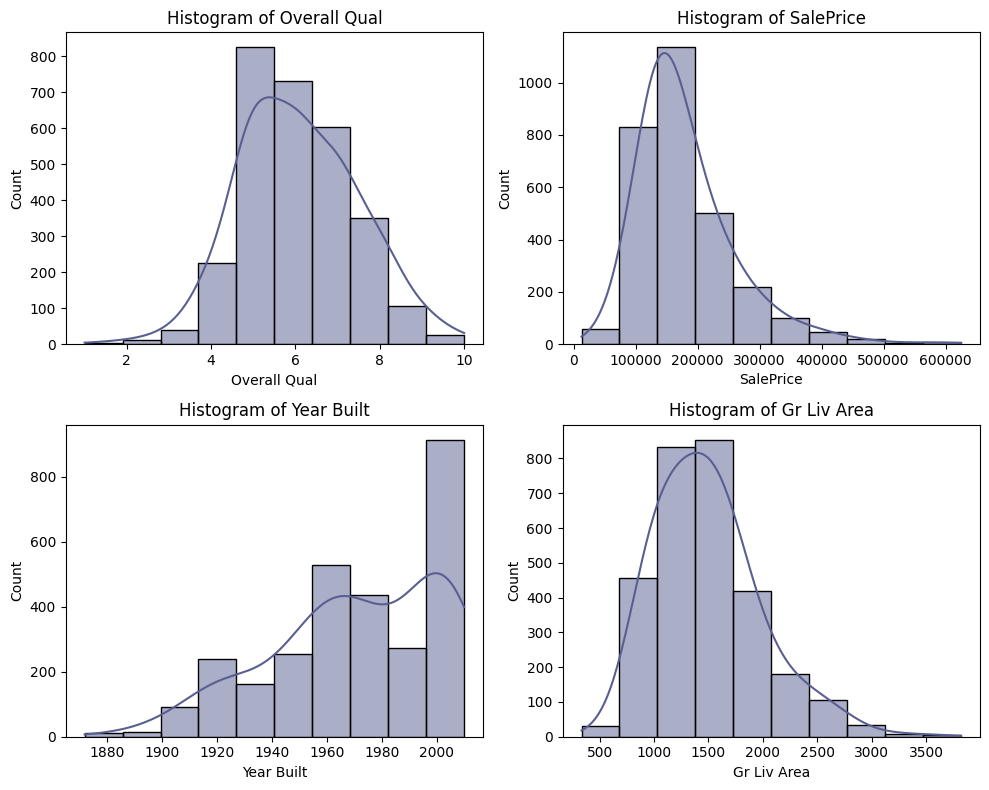

In [ ]:
#DISTRIBUTION OF NUMERICAL VARIABLES


# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# List of columns for which you want to create histograms
columns = ['Overall Qual', 'SalePrice', 'Year Built', 'Gr Liv Area']

# Loop through columns and create histograms
for i, column in enumerate(columns):
    sns.histplot(ex_data[column], bins=10, kde=True, kde_kws={'bw_adjust':2}, color='#595f91', ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


As seen above, the Sales Price, Living Area and Overall Quality have a distribution which is similar to a bell curve or normal distribution. We can say that these three variables are somewhat normally distributed as expected. Regardless, their shapes and sizes are all different which indicates the spread and frequency of the values within these variables.

Next, let's look at the distribution of our Neighborhood variable based on the number of houses in each neighborhood.

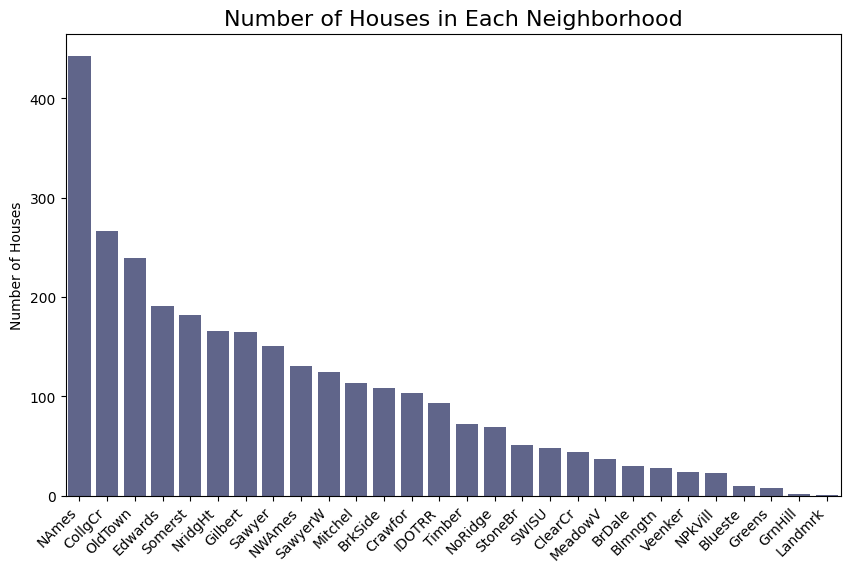

In [ ]:
# Count the occurrences of each neighborhood
neighborhood_counts = ex_data['Neighborhood'].value_counts()

# Sort neighborhoods based on their frequency
sorted_neighborhoods = neighborhood_counts.index

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn with neighborhoods sorted by frequency
sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts, color='#595f91', order=sorted_neighborhoods)

# Add a title to the plot
plt.title('Number of Houses in Each Neighborhood', fontsize=16)

# Set the x-axis label
plt.xticks(rotation=45, ha='right')

# Set the y-axis label
plt.ylabel('Number of Houses')

# Show the plot
plt.show()



We can understand that **North Ames**, **College Creek**, **Old Town**, **Edwards** and **Somerset** are among the popular neighborhoods with a lot of houses. This can be due to the fact that these are tight-knit or congested neighborhoods, or because they are very large neighborhoods of the town.

Next we will look at the Neighborhoods while considering their average sale prices. This will tell us which neighborhoods are expensive to live in and which ones are cheap.
To do this, we need to group our data by Neighborhood and compute the mean of the Sale Price. Then we can plot a bar chart to visualise the results.

In [ ]:
avg_price_by_nbr = ex_data[['SalePrice','Neighborhood']].groupby('Neighborhood').mean()

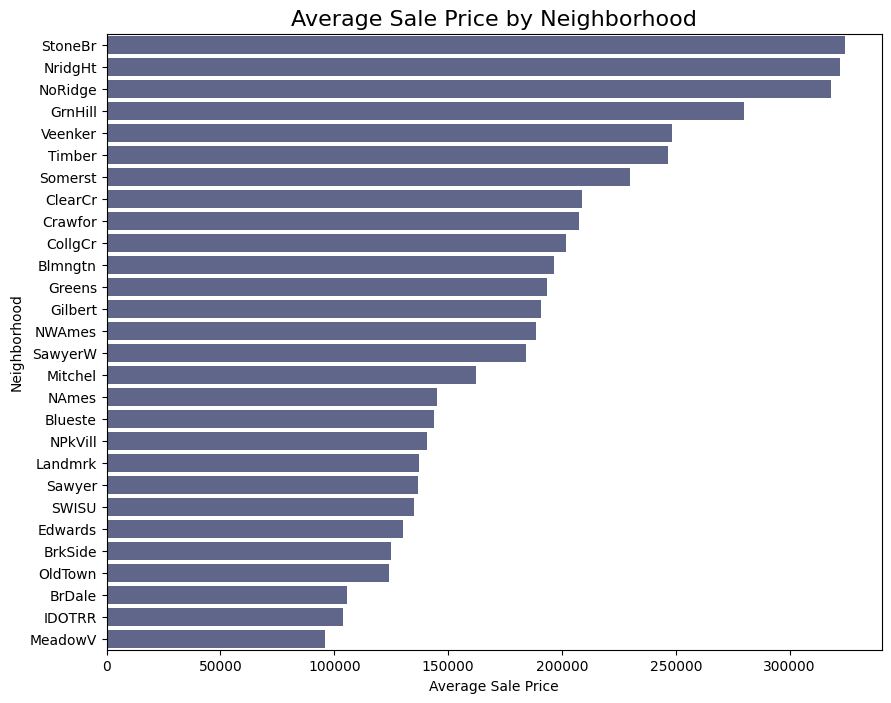

In [ ]:
# Calculate the average price by neighborhood
avg_price_by_nbr = ex_data.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a bar plot using Seaborn with neighborhoods sorted by average price
sns.barplot(y=avg_price_by_nbr.index, x=avg_price_by_nbr, color='#595f91')

# Add a title to the plot
plt.title('Average Sale Price by Neighborhood', fontsize=16)

# Set the y-axis label
plt.ylabel('Neighborhood')

# Set the x-axis label
plt.xlabel('Average Sale Price')

# Show the plot
plt.show()


By looking at this chart, we can easily identify that neighborhoods like **Stone Brook, Northridge Heights, Northridge, Green Hills & Veenker** are more expensive. This can be due to the reasons that they are elite neighborhoods, or close to the town center or consist of big houses, or recently developed neighborhoods.

Now let's have a look at the correlations between our numerical variables: Sale Price, Living Area, Built Year and Overall Quality. First we will develop a correlation matrix and a heatmap to understand mutual correlations between the variables.

In [ ]:
corr_matrix = ex_data[['Gr Liv Area','Overall Qual','SalePrice','Year Built']].corr()
corr_matrix

,Gr Liv Area,Overall Qual,SalePrice,Year Built
Gr Liv Area,1.000000,0.564797,0.719463,0.239305
Overall Qual,0.564797,1.000000,0.805236,0.596621
SalePrice,0.719463,0.805236,1.000000,0.565110
Year Built,0.239305,0.596621,0.565110,1.000000


<Axes: >

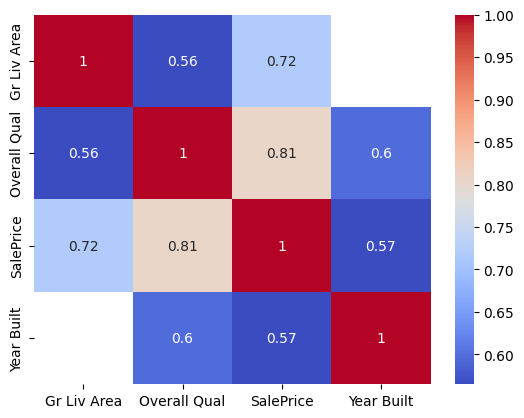

In [ ]:
# Create a heatmap for values in the correlation matrix that are greater than 0.5
# cmap specifies the color map for the heatmap, 'coolwarm' is used here
# annot=True adds the numeric values in each cell

sns.heatmap(corr_matrix[corr_matrix>0.5], cmap = 'coolwarm', annot = True)

All of these variables are highly correlated with the Sale Price, especially the Overall Quality and Living Area. Let's create some scatterplots to visualise these trends among these variables.
Here the Sale Price is graphed against the other 3 variables using a scatterplot to see the trend.

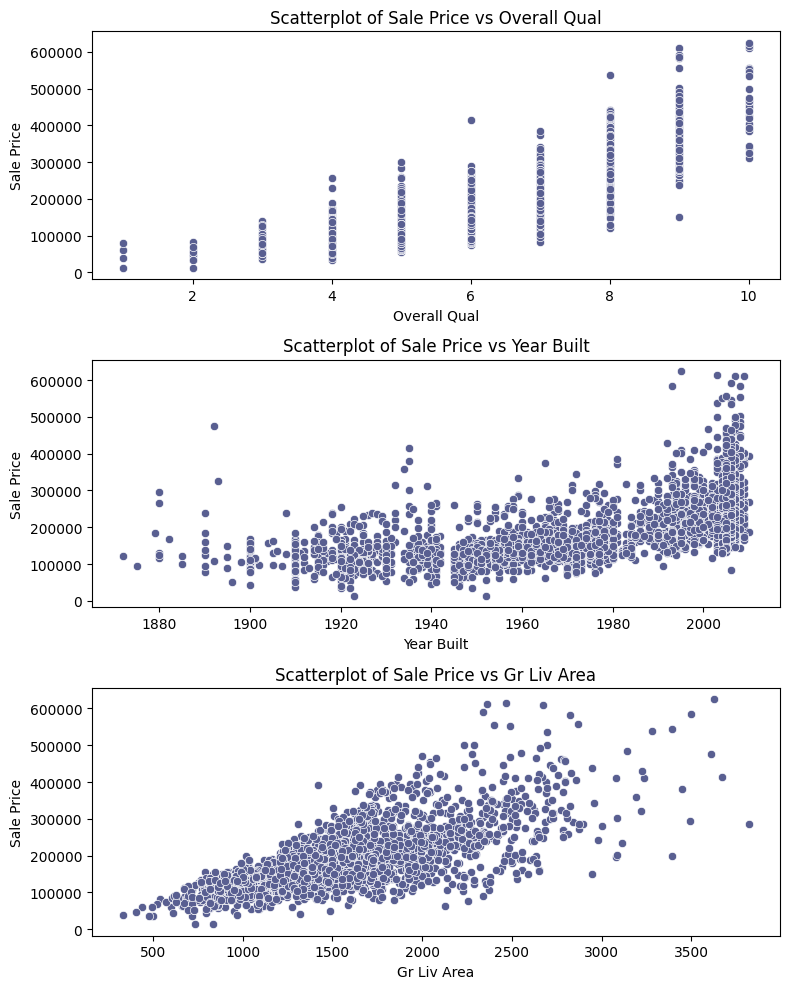

In [ ]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# List of columns for which you want to create scatterplots
columns = ['Overall Qual', 'Year Built', 'Gr Liv Area']

# Loop through columns and create scatterplots
for i, column in enumerate(columns):
    sns.scatterplot(data=ex_data, x=column, y='SalePrice', color='#595f91', ax=axes[i])
    axes[i].set_title(f'Scatterplot of Sale Price vs {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Sale Price')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


We can observe that these variables have a positive linear trend with the Sale Price which is expected as well as intuitive. These trends can be put into words as follows:

*  Higher the overall Quality of the house, the higher its Sales Price and vice versa. Houses in good quality and condition sell at a higher price naturally.

*  More modern houses are sold at a higher price because they are built recently and the material is less prone to degradation, requires less maintenance etc. Plus newly built houses are definitely more attractive, hence higher price.

*   The bigger the house, the more expensive it is. Houses like villas, mansions and bungalows are obviously going to be more costly than flats or terraced houses.





##CONCLUSION

###Key Findings
The process of performing the EDA started by ingesting the datasets, merging them and cleaning them along the way wherever appropriate and necessary by removing duplicates, outliers and missing values. Subsequently, the data was filtered and transformed after careful considerations. Although the dataset contained a huge number of variables, most of them were providing the same information from different angles. To deal with this, indicative variables which represented a good part of the data and provided meaning to the EDA were selected and analysed using visualisations and correlations.

The EDA has provided a good number of insights into the data that was provided. For instance, the Sale Price was a very powerful variable which was correlated with a number of other variables such as the Living Area (in square feet), the neighbourhood in which the house is located, the overall quality of the house and the year it was built. These important variables presented a healthy picture of the house market of the town and these variables are what any buyer would most probably look at before purchasing the property.

It was found that there are certain neighborhoods which are quite popular considering the number of houses, while some others are quite expensive when it come to the price parameter. Similarly, the houses built recently were found to be more expensive than older properties. A high-quality house was found to cost more, and a larger house also means a bigger price tag.



###Limitations & Recommendations

While performing the EDA, only two variables were investigated at a time. This limits the scope of the EDA and it becomes difficult to draw meaning. If more variables are explored together, such as inspecting the neighborhoods with their average prices and the number of houses built in each neighborhood over the years, it would allow a better understanding of the market and how it changes based on certain factors. Similarly, other variables such as number of bedrooms in the house and the quality of the material could also be included in the EDA to make it richer and more effective.

It really depends on the depth and breadth of the analysis which gives more meaning to it and discovers hidden information from it. Overall, it was a good analysis which considered a number of good parameters and generated some insights about them.